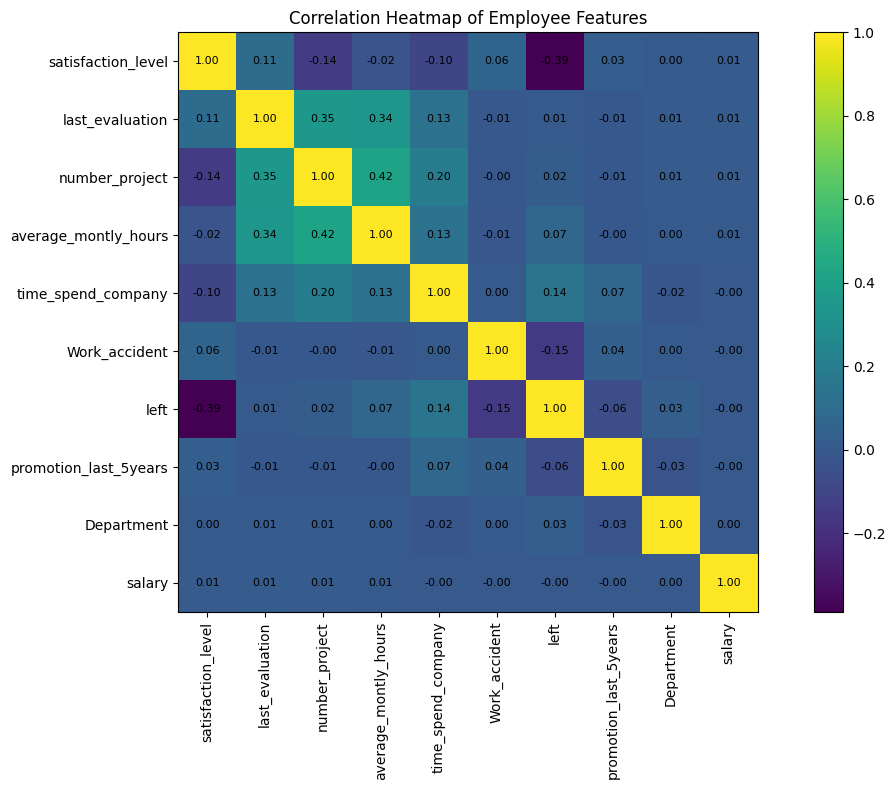

C:\Users\Haani\AppData\Local\Temp\ipykernel_8020\493335750.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(data, labels=numeric_features, patch_artist=True)


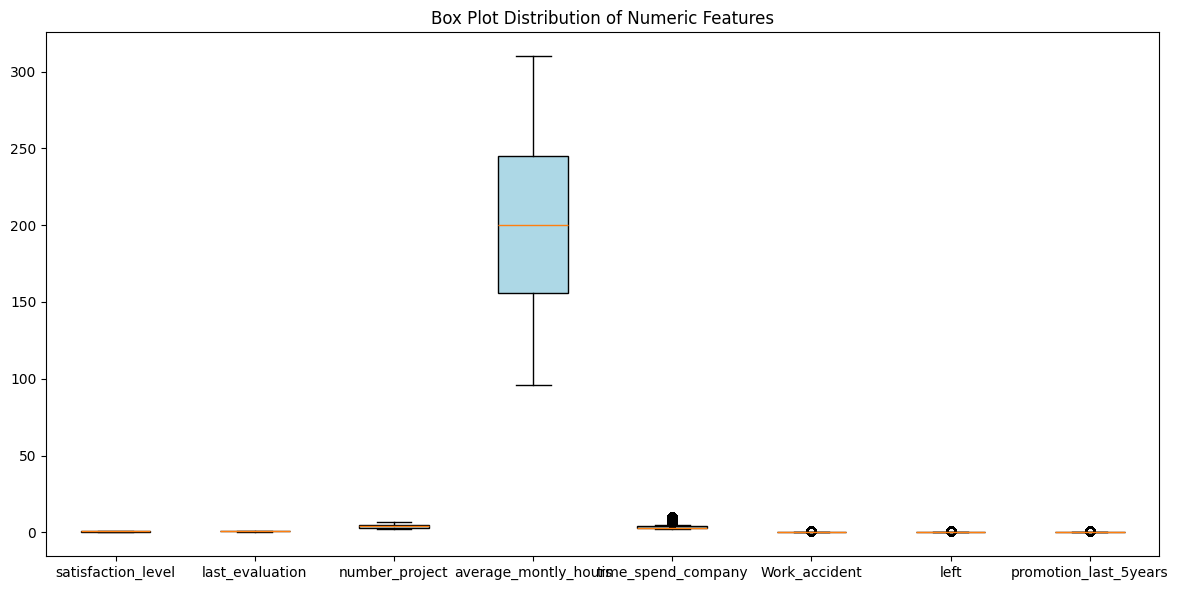

In [4]:
# Employee Attrition Exploratory Data Analysis
# Correlation Heatmap + Box Plot Analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- Load Dataset --------------------
df = pd.read_excel("ML470_S3_HR_Data_Practice.xlsx")
# -------------------- Encode Categorical Variables --------------------
df_encoded = df.copy()
df_encoded["Department"] = df_encoded["Department"].astype("category").cat.codes
df_encoded["salary"] = df_encoded["salary"].astype("category").cat.codes

# -------------------- Correlation Heatmap --------------------
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
heatmap = plt.imshow(corr_matrix)
plt.colorbar(heatmap)

plt.xticks(range(len(corr_matrix.columns)),
           corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)),
           corr_matrix.columns)

# Annotate correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i,
                 f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", fontsize=8)

plt.title("Correlation Heatmap of Employee Features")
plt.tight_layout()
plt.show()

# -------------------- Box Plot Analysis --------------------
numeric_features = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
    "Work_accident",
    "left",
    "promotion_last_5years"
]

data = [df_encoded[col] for col in numeric_features]

plt.figure(figsize=(12, 6))
bplot = plt.boxplot(data, labels=numeric_features, patch_artist=True)
for box in bplot['boxes']:
    box.set(facecolor='lightblue', edgecolor='black')
plt.title("Box Plot Distribution of Numeric Features")
plt.tight_layout()
plt.show()
